## Passo 1
- Análise descritiva.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)
from imblearn.over_sampling import SMOTE
from scipy.stats import (
    shapiro,
    mannwhitneyu,
    chi2_contingency,
    pointbiserialr,
    pearsonr,
    spearmanr,
    f_oneway
)
from Utils import (
    scartterplot,
    boxplots_comparacao,
    boxplots,
    countplots_comparacao,
    countplots,
    histplots_comparacao
)
import warnings
warnings.filterwarnings('ignore')

nível de satisfação do colaborador com a empresa, média de horas mensais trabalhadas, tempo de empresa, acidente de trabalho, departamento, salário ...

In [2]:
df = pd.read_csv('Data/HR_Abandono.csv', sep=';')
df.head()

id satisfaction_level last_evaluation  average_montly_hours  \
0   1               0,38            0,53                   157   
1   2                0,8            0,86                   262   
2   3               0,11            0,88                   272   
3   4               0,72            0,87                   223   
4   5               0,37            0,52                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   num_project  depto  
0            2  sales  
1            5  sales  
2            6  sales  
3            5  sales  
4            2  sales

In [3]:
df.shape

(14999, 11)

<Axes: >

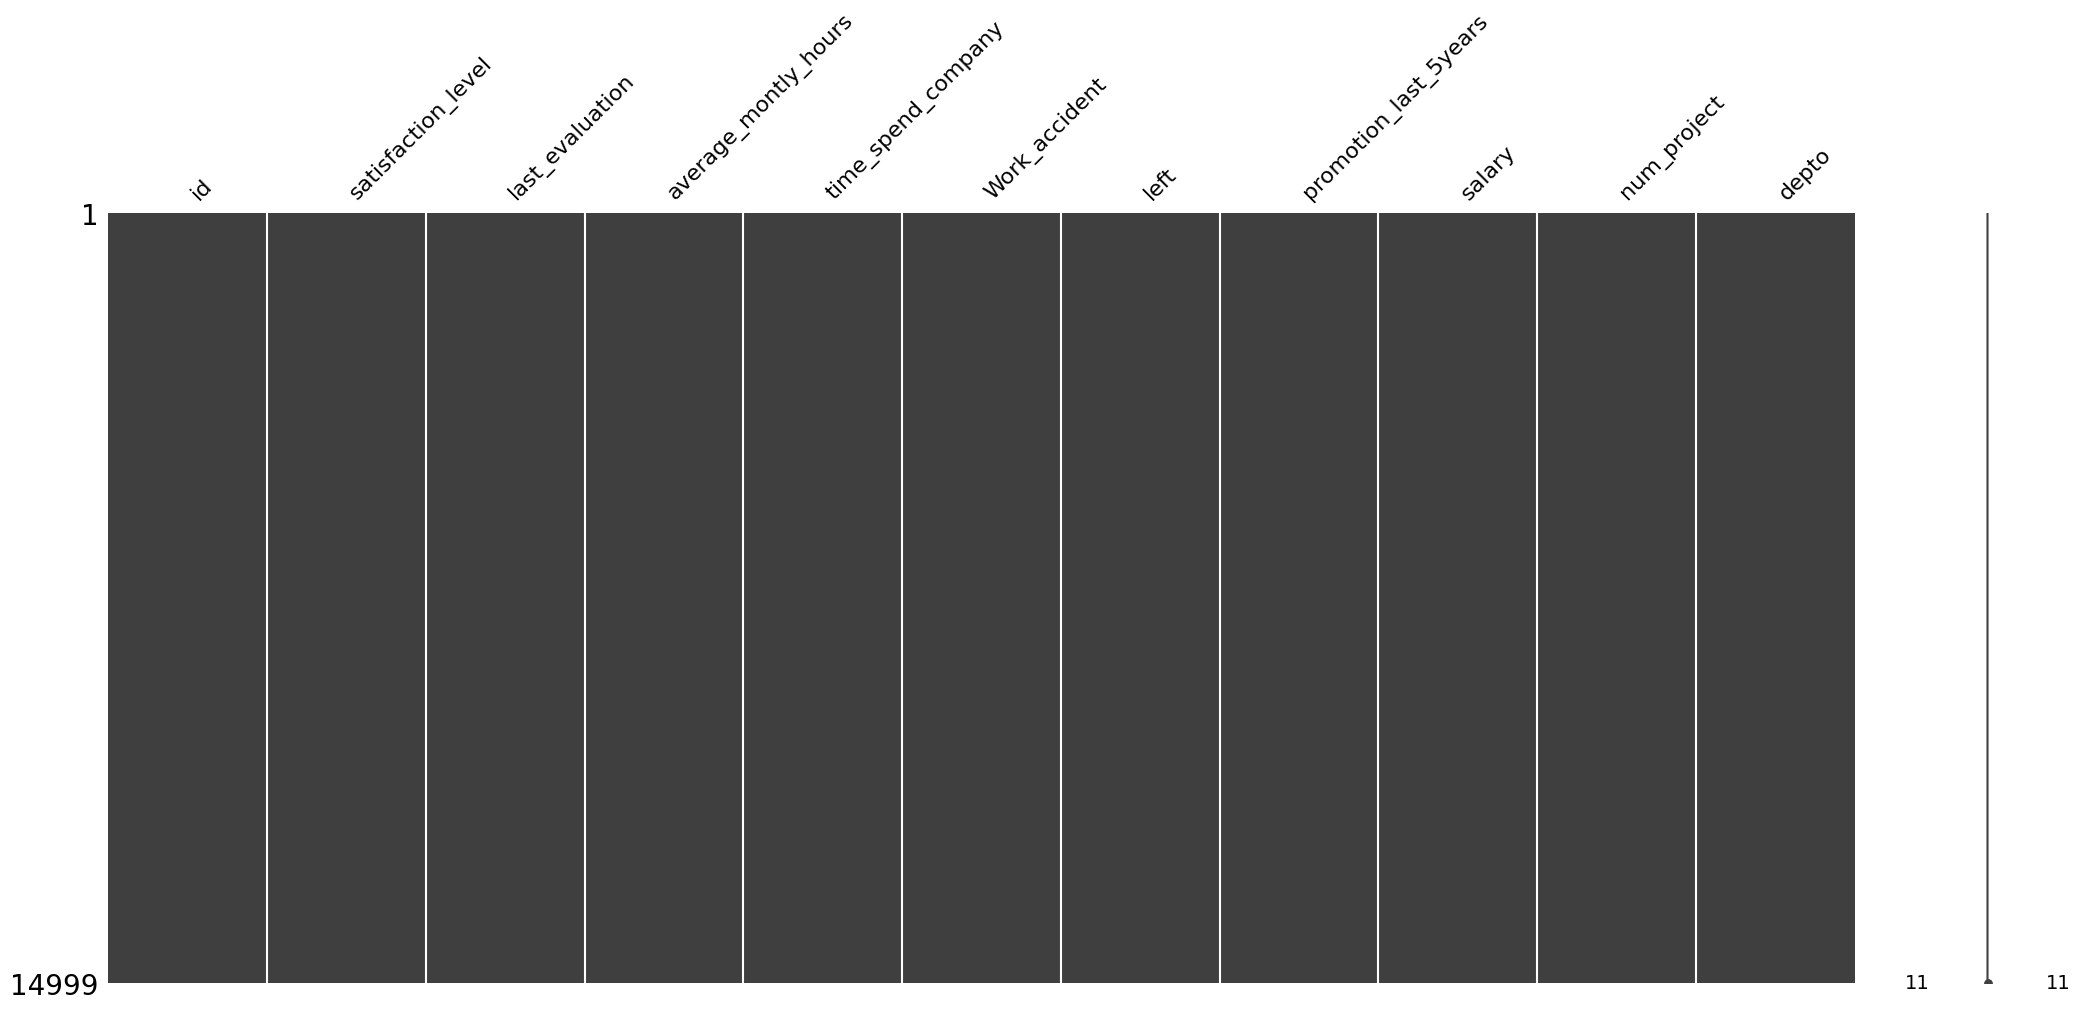

In [4]:
msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

Sem registros nulos e duplicados

In [8]:
df['satisfaction_level'] = df['satisfaction_level'].str.replace(',', '.').astype(float)
df['last_evaluation'] = df['last_evaluation'].str.replace(',', '.').astype(float)
df.drop('id', axis=1, inplace=True)

- Remover coluna id
- Trocar , por .
- Converter dados de satisfaction_level e last_evaluation do tipo object para float64

In [9]:
print(set(df['salary']))
print(set(df['depto']))

{'high', 'low', 'medium'}
{'hr', 'technical', 'RandD', 'accounting', 'sales', 'marketing', 'IT', 'support', 'product_mng', 'management'}


In [10]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [11]:
df['depto'].value_counts()

depto
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [12]:
df[['salary', 'depto']].describe().round(2)

salary  depto
count   14999  14999
unique      3     10
top       low  sales
freq     7316   4140

In [13]:
df['Work_accident'].value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [14]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [15]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

Como a contagem de valores distintos(unique), a moda(top) e a frequência da mesma(freq)

In [16]:
df.describe().round(2).T

count    mean    std    min     25%     50%     75%  \
satisfaction_level     14999.0    0.61   0.25   0.01    0.44    0.64    0.82   
last_evaluation        14999.0    0.72   0.17   0.36    0.56    0.72    0.87   
average_montly_hours   14999.0  201.08  50.18  96.00  156.00  200.00  245.00   
time_spend_company     14999.0    3.41   1.18   2.00    3.00    3.00    4.00   
Work_accident          14999.0    0.14   0.35   0.00    0.00    0.00    0.00   
left                   14999.0    0.24   0.43   0.00    0.00    0.00    0.00   
promotion_last_5years  14999.0    0.02   0.14   0.00    0.00    0.00    0.00   
num_project            14999.0    3.79   1.19   2.00    3.00    4.00    5.00   

                         max  
satisfaction_level       1.0  
last_evaluation          1.0  
average_montly_hours   810.0  
time_spend_company       6.0  
Work_accident            1.0  
left                     1.0  
promotion_last_5years    1.0  
num_project              6.0

Contagem de linhas (count), o cálculo da média (mean) e desvio padrão (std) e identifica o valor mínimo (min), os quartis (25%, 50% e 75%) e o valor máximo (max).

#### Variáveis
---
- Variáveis Quantitativas Contínuas: Nível de satisfação, ultima avaliação.
---
- Variáveis Quantitativas Discretas: Média de horas trabalhadas, tempo de empresa, número de projetos.
---
- Variáveis Qualitativas Binarias: Acidentes de trabalho, saiu da empresa, promoção nos últimos 5 anos.
---
- Variável Qualitativa Nominal: Nível de salário, departamento

## Passo 2
- Análise exploratória.

> Perguntas
- O que interfere no abandono da empresa?
  - Nível de satisfação com a empresa, última avaliação
  - Tempo de empresa com promoção nos últimos 5 anos
  - Média de horas trabalhadas e número de projetos
  - Acidentes de trabalho
  - Departamento
  - Nível de salário

In [17]:
sns.set_style('whitegrid')

In [18]:
total = len(df)
total_non_left = df[df['left'] == 0].left.count()
total_left = df[df['left'] == 1].left.count()

percentual_Left = total_left / total 

print("Total de dados: ", total)
print("Total de não abandonos da empresa: ", total_non_left)
print("Total de abandonos da empresa: ", total_left)
print("Percentual de abandonos na base: ", (round(percentual_Left, 2)*100), "%")

Total de dados:  14999
Total de não abandonos da empresa:  11428
Total de abandonos da empresa:  3571
Percentual de abandonos na base:  24.0 %


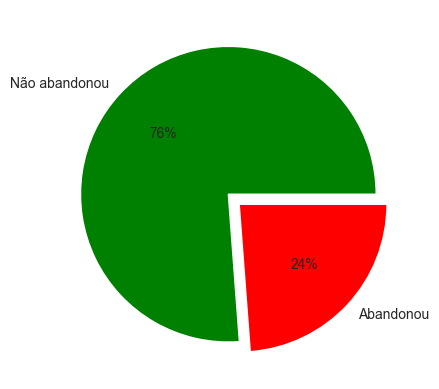

In [19]:
plt.pie(df['left'].value_counts(), labels=['Não abandonou', 'Abandonou'], autopct='%.0f%%', explode=(0, 0.1), colors=('g', 'r'))
plt.show()

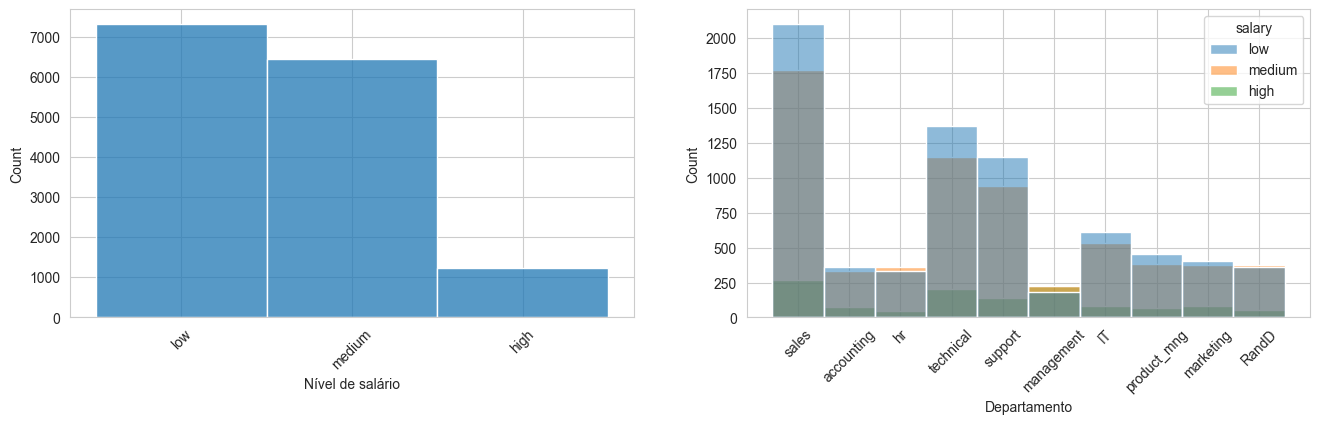

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df, x='salary', ax=ax[0])
ax[0].set_xlabel('Nível de salário')
ax[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df, x='depto', ax=ax[1], hue='salary')
ax[1].set_xlabel('Departamento')
ax[1].tick_params(axis='x', rotation=45)
plt.show()

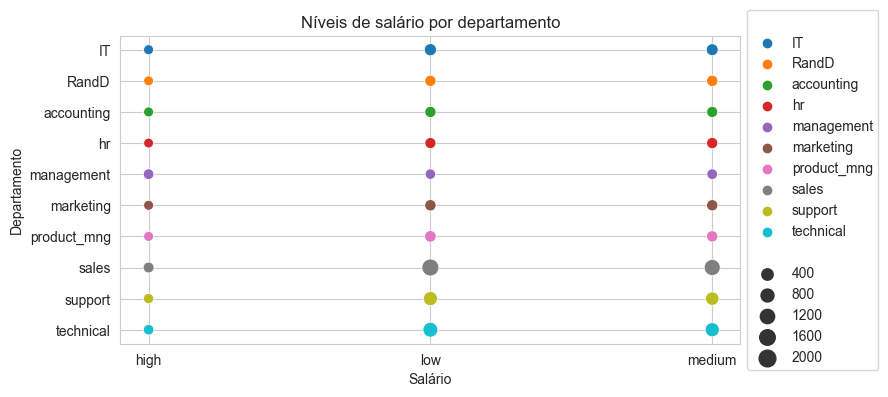

In [21]:
depto_counts = df.groupby(['salary', 'depto']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=depto_counts, x='salary', y='depto', size='count', ax=ax, hue='depto', sizes=(50, 150))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.texts[0].set_text('') #type: ignore
legend.texts[11].set_text('') #type: ignore
plt.title('Níveis de salário por departamento')
plt.xlabel('Salário')
plt.ylabel('Departamento')
plt.show()

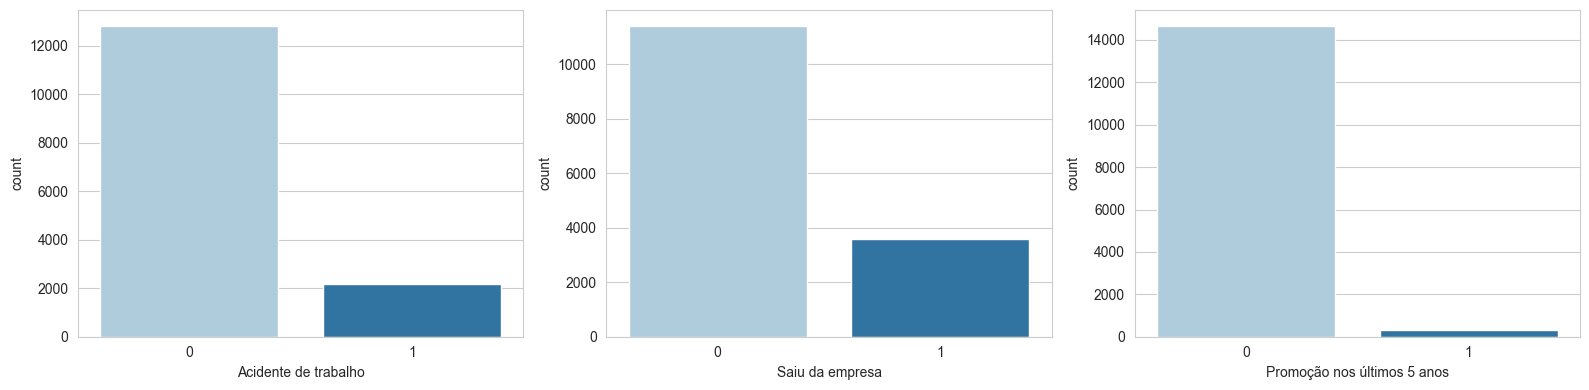

In [22]:
countplots(df)

In [23]:
boxplots(df)

In [24]:
scartterplot(df)

Verificar outliers

In [25]:
Q1 = df['average_montly_hours'].quantile(.25)
Q3 = df['average_montly_hours'].quantile(.75)
IQR = Q3 - Q1
LI = Q1 - 1.5 * IQR
LS = Q3 + 1.5 * IQR
print(Q1)
print(Q3)
print(IQR)
print(LI)
print(LS)

156.0
245.0
89.0
22.5
378.5


In [26]:
outliers = (df['average_montly_hours'] < LI) | (df['average_montly_hours'] > LS)
df[outliers]

satisfaction_level  last_evaluation  average_montly_hours  \
14972                0.11             0.97                   810   

       time_spend_company  Work_accident  left  promotion_last_5years  salary  \
14972                   4              0     1                      0  medium   

       num_project       depto  
14972            6  accounting

Outlier não removido por registro conter maior quantidade de projetos envolvidos e por isso saiu da empresa.

Conversao das variáveis qualitativas para ser usada no modelo

In [27]:
df_non_left = df[df['left'] == 0]
df_left = df[df['left'] == 1]

In [28]:
df_left.head()

satisfaction_level  last_evaluation  average_montly_hours  \
0                0.38             0.53                   157   
1                0.80             0.86                   262   
2                0.11             0.88                   272   
3                0.72             0.87                   223   
4                0.37             0.52                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   num_project  depto  
0            2  sales  
1            5  sales  
2            6  sales  
3            5  sales  
4            2  sales

In [29]:
df_non_left.head()

satisfaction_level  last_evaluation  average_montly_hours  \
2000                0.58             0.74                   215   
2001                0.82             0.67                   202   
2002                0.45             0.69                   193   
2003                0.78             0.82                   247   
2004                0.49             0.60                   214   

      time_spend_company  Work_accident  left  promotion_last_5years salary  \
2000                   3              0     0                      0    low   
2001                   3              0     0                      0    low   
2002                   3              0     0                      0    low   
2003                   3              0     0                      0    low   
2004                   2              0     0                      0    low   

      num_project  depto  
2000            4  sales  
2001            2  sales  
2002            5  sales  
2003            5  sales  
2004            3  sales

In [30]:
df_left.describe().round(2).T

count    mean    std     min     25%     50%     75%  \
satisfaction_level     3571.0    0.44   0.26    0.01    0.13    0.41    0.73   
last_evaluation        3571.0    0.72   0.20    0.45    0.52    0.79    0.90   
average_montly_hours   3571.0  207.56  62.00  126.00  146.00  224.00  262.00   
time_spend_company     3571.0    3.88   0.98    2.00    3.00    4.00    5.00   
Work_accident          3571.0    0.05   0.21    0.00    0.00    0.00    0.00   
left                   3571.0    1.00   0.00    1.00    1.00    1.00    1.00   
promotion_last_5years  3571.0    0.01   0.07    0.00    0.00    0.00    0.00   
num_project            3571.0    3.78   1.71    2.00    2.00    4.00    6.00   

                          max  
satisfaction_level       0.92  
last_evaluation          1.00  
average_montly_hours   810.00  
time_spend_company       6.00  
Work_accident            1.00  
left                     1.00  
promotion_last_5years    1.00  
num_project              6.00

In [31]:
df_non_left.describe().round(2).T

count    mean    std    min     25%     50%     75%  \
satisfaction_level     11428.0    0.67   0.22   0.12    0.54    0.69    0.84   
last_evaluation        11428.0    0.72   0.16   0.36    0.58    0.71    0.85   
average_montly_hours   11428.0  199.06  45.68  96.00  162.00  198.00  238.00   
time_spend_company     11428.0    3.26   1.19   2.00    2.00    3.00    4.00   
Work_accident          11428.0    0.18   0.38   0.00    0.00    0.00    0.00   
left                   11428.0    0.00   0.00   0.00    0.00    0.00    0.00   
promotion_last_5years  11428.0    0.03   0.16   0.00    0.00    0.00    0.00   
num_project            11428.0    3.79   0.98   2.00    3.00    4.00    4.00   

                         max  
satisfaction_level       1.0  
last_evaluation          1.0  
average_montly_hours   287.0  
time_spend_company       6.0  
Work_accident            1.0  
left                     0.0  
promotion_last_5years    1.0  
num_project              6.0

In [32]:
boxplots_comparacao(df_left, df_non_left)

In [33]:
df_left_log = df_left
df_non_left_log = df_non_left
for column in [0, 1, 2, 3, 8]:
    df_left_log.iloc[:, column] = np.log10(df_left_log.iloc[:, column])

for column in [0, 1, 2, 3, 8]:
    df_non_left_log.iloc[:, column] = np.log10(df_non_left_log.iloc[:, column])

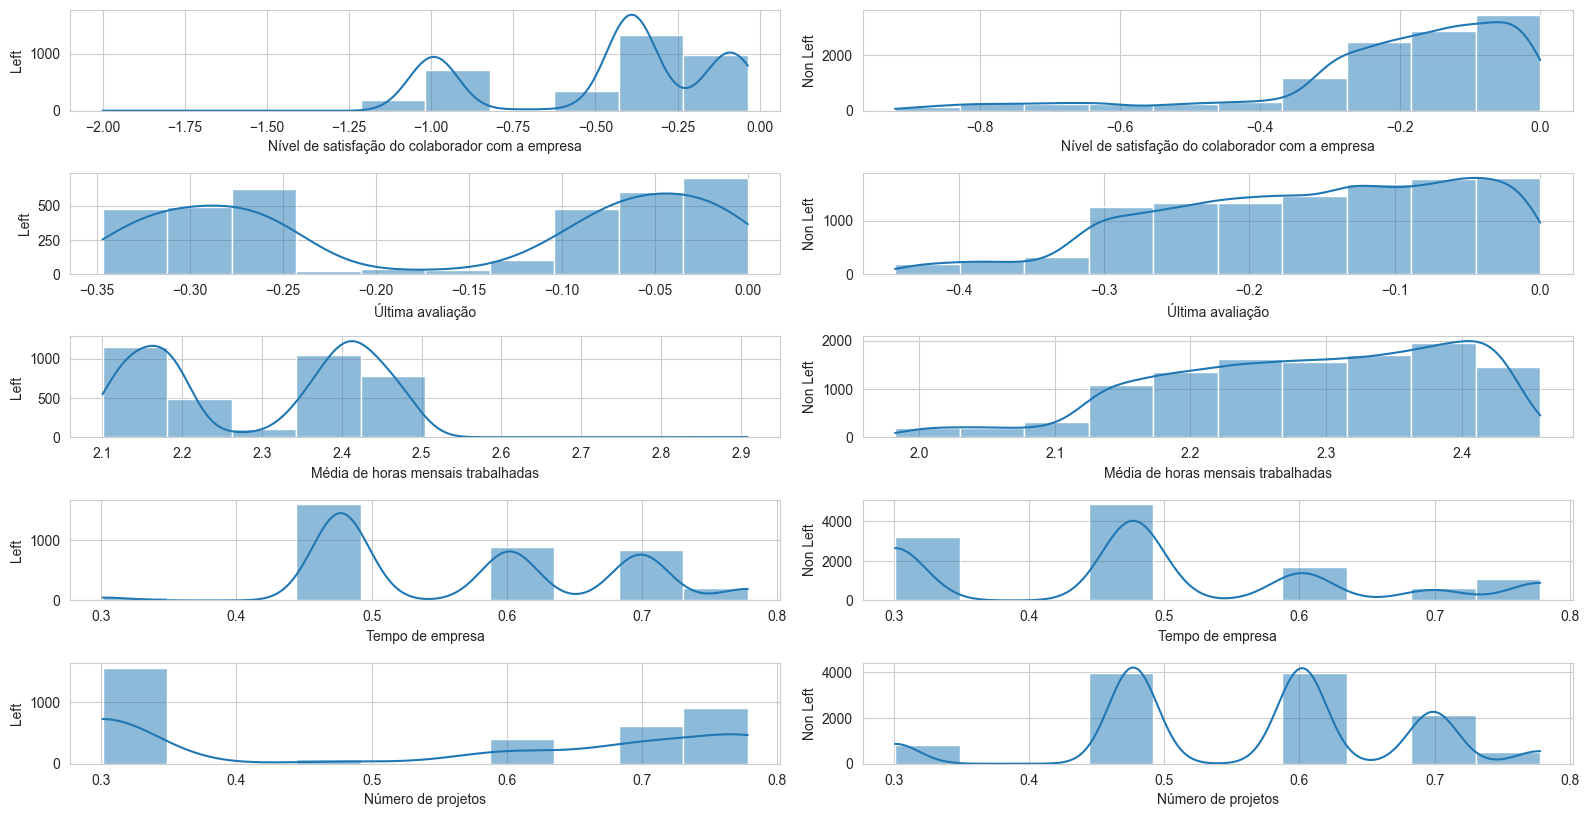

In [34]:
histplots_comparacao(df_left_log, df_non_left_log)

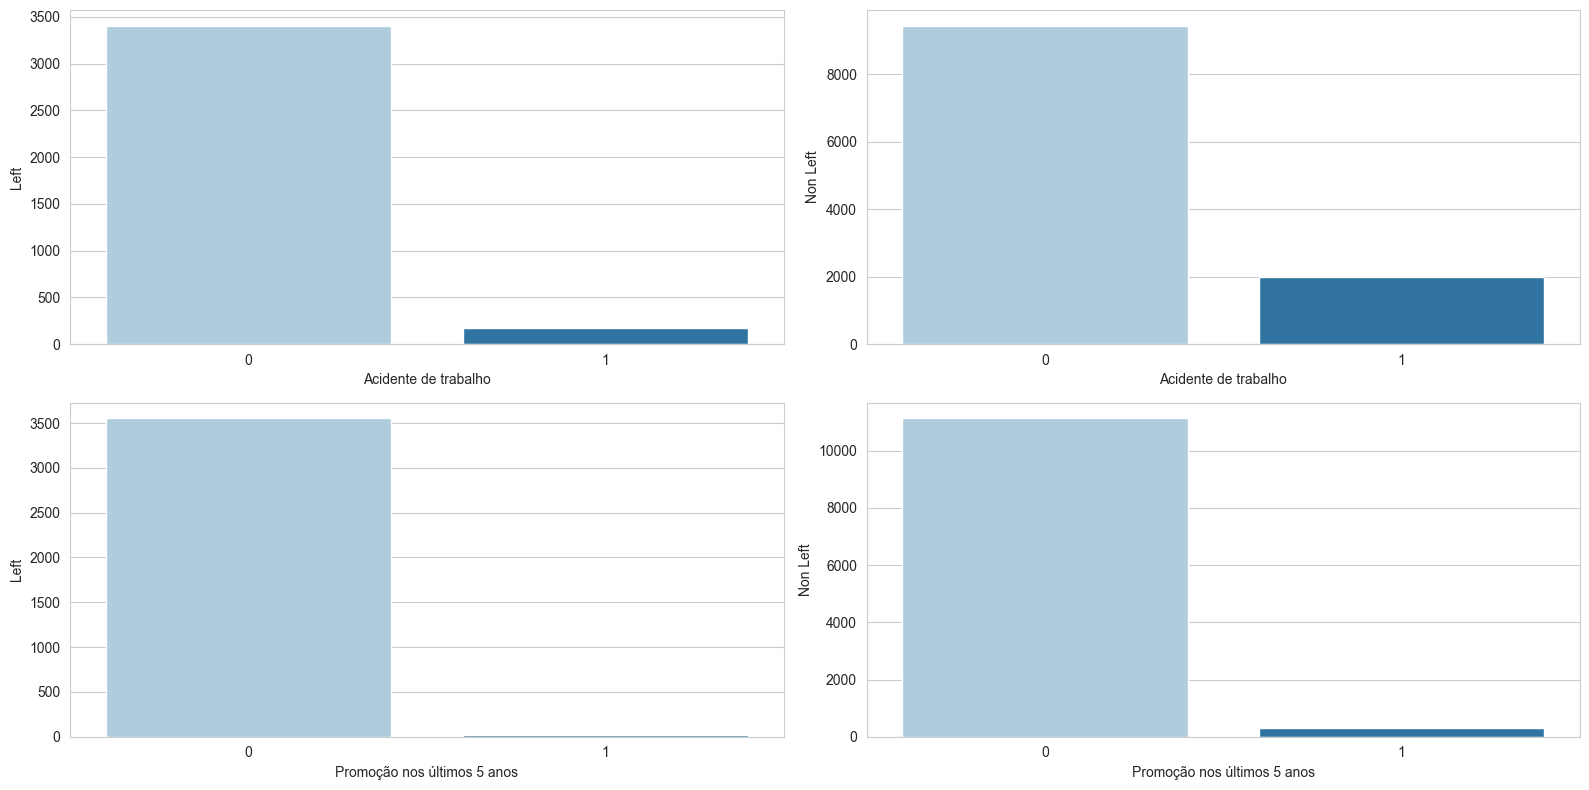

In [35]:
countplots_comparacao(df_left, df_non_left)

In [36]:
total_left = len(df_left)
total_p_5y = df_left[df_left['promotion_last_5years'] == 1].promotion_last_5years.count()
total_wa = df_left[df_left['Work_accident'] == 1].Work_accident.count()
percentual_promotion = total_p_5y / total_left
percentual_work_accident = total_wa / total_left

total_nleft = len(df_non_left)
total_np_5y = df_non_left[df_non_left['promotion_last_5years'] == 1].promotion_last_5years.count()
total_nwa = df_non_left[df_non_left['Work_accident'] == 1].Work_accident.count()
percentual_npromotion = total_np_5y / total_nleft
percentual_nwork_accident = total_nwa / total_nleft

print("Percentual acidentes de trabalho em não abandonos na base: ", (round(percentual_nwork_accident, 2)*100), "%")
print("Percentual acidentes de trabalho em abandonos na base: ", (round(percentual_work_accident, 2)*100), "%")
print("Percentual promoção nos últimos 5 anos em não abandonos na base: ", (round(percentual_npromotion, 2)*100), "%")
print("Percentual promoção nos últimos 5 anos em abandonos na base: ", (round(percentual_promotion, 2)*100), "%")

Percentual acidentes de trabalho em não abandonos na base:  18.0 %
Percentual acidentes de trabalho em abandonos na base:  5.0 %
Percentual promoção nos últimos 5 anos em não abandonos na base:  3.0 %
Percentual promoção nos últimos 5 anos em abandonos na base:  1.0 %


> Respostas
---
- A satisfação dos colaboradores que abandonaram a empresa é em media e mediana menor.
- A última avaliação dos colaboradores que abandonaram a empresa tem uma mediana maior.
- Colaboradores que abandonaram a empresa trabalhavam em média mais horas mensais.
- Colaboradores que abandonaram a empresa tinham um tempo maior de empresa.
- Colaboradores que abandonaram a empresa tiveram um menor número de promoções nos últimos 5 anos.
---
- Nota-se que colaborados bem avaliados, com maior tempo de empresa, trabalham mais horas mensais e com um número menor promoções tendem a ficar mais insatisfeitos e abandonarem a empresa.

## Passo 3
- Hipóteses estatísticas.

> Hipotes
---
- A satisfação dos colaboradores interfere no abandono da empresa.
- Avaliação de colaboradores, maior tempo de empresa, maior média de horas trabalhadas mensais e um número menor promoções interferem no abandono da empresa.

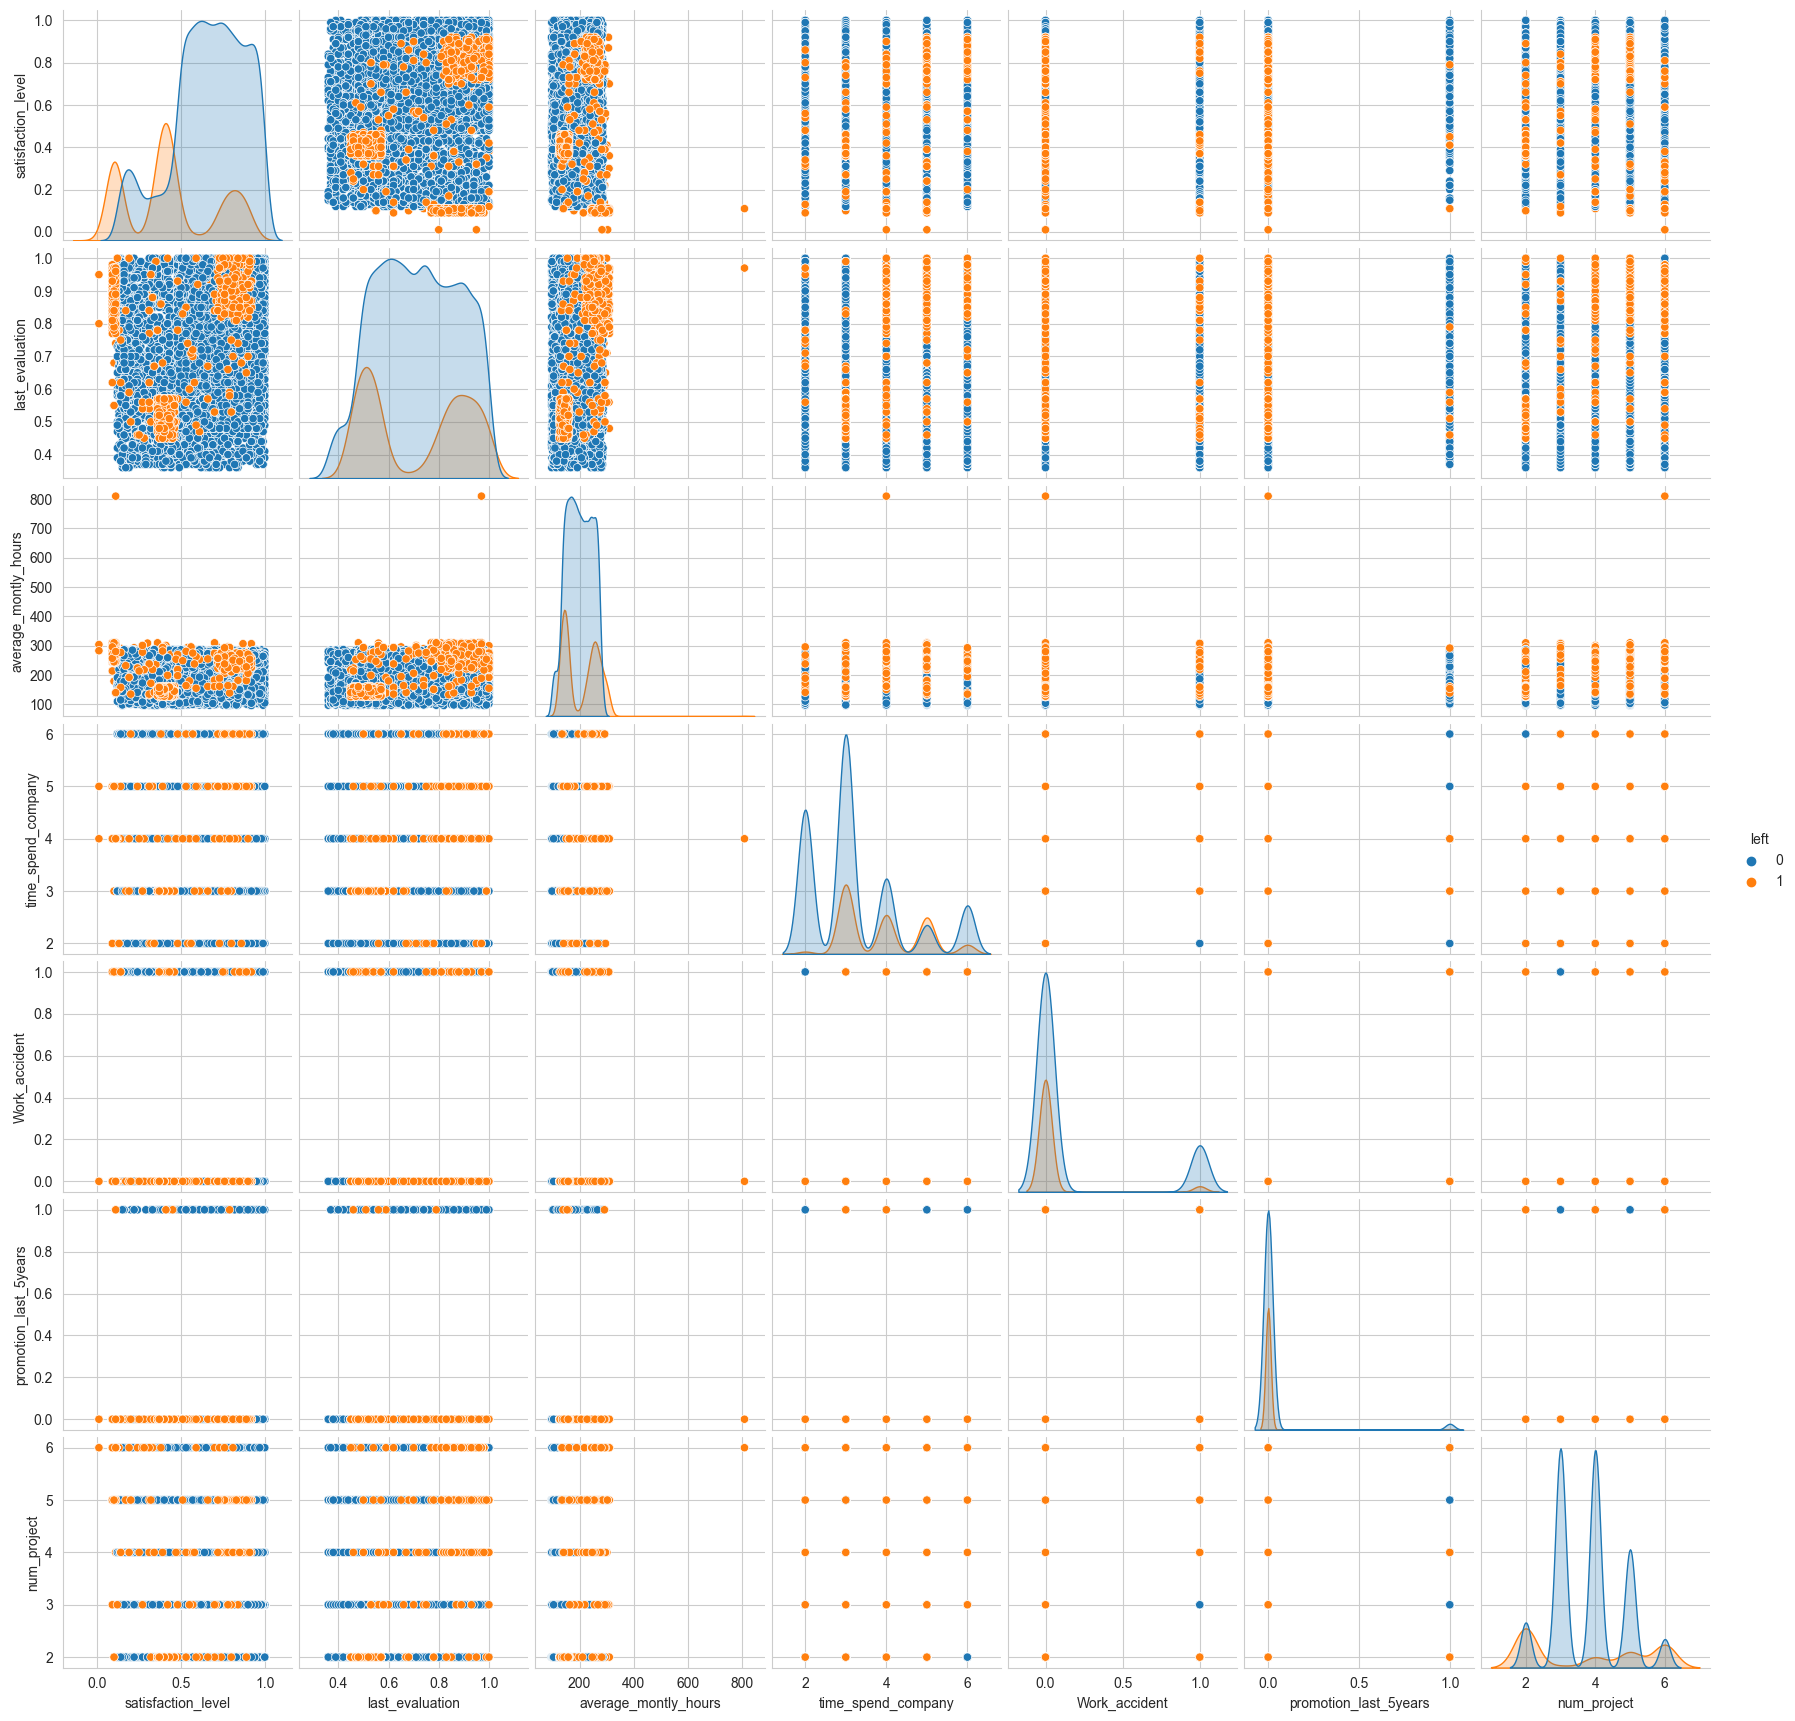

In [37]:
sns.pairplot(df, hue='left')
plt.show()

##### Testes de hipótese nula utilizados
- Correlação de Pearson: Mede o nível em que as variáveis numéricas estão associadas linearmente (-1, 1). Multiplicamos os desvios das médias da variável A e B e dividimos pelo produto do desvio padrão.                                                                
---
- Correlação de Spearman: Media estatística não paramétrica que mede o nível em que as variáveis ordinais ou continuas estão associadas monotonicamente (variável A aumenta a B aumenta ou diminuem) (-1, 1).
---
- Correlação de Bisserial: Utilizado para medir a correlação entre uma variável contínua e uma variável binária (-1, 1).
---
- Teste de Shapiro-Wilk: Verifica se uma amostra de dados segue uma distribuição normal. A hipótese nula do teste é que a amostra segue uma distribuição normal. Se o valor-p (valor de probabilidade) do teste for menor do que o nível de significância escolhido (geralmente 0,05), a hipótese nula é rejeitada e conclui-se que a amostra não segue uma distribuição normal.
---
- Teste não paramétrico Mann-Whitney U: Compara duas amostras para determinar se elas têm distribuições diferentes. Ele classifica as observações de cada amostra(ou seja ordená-las em uma determinada ordem com base nos valores que representam), soma as classificações em cada amostra e compara as somas para obter um valor U. Se esse valor for grande o suficiente, podemos concluir que as médias das duas amostras são significativamente diferentes. Em resumo, o teste de Mann-Whitney U é usado para verificar se duas amostras são estatisticamente diferentes entre si, mesmo que elas não sigam uma distribuição normal.
  -   alternative='two-sided': 
        Essa é a opção padrão. Neste caso, a hipótese alternativa testada é que a mediana da primeira amostra é diferente da mediana da segunda amostra. 
        É apropriado quando queremos verificar se há diferenças significativas entre as distribuições das duas amostras, independentemente de qual mediana é maior.
  - alternative='greater': Neste caso, a hipótese alternativa testada é que a mediana da primeira amostra é maior do que a mediana da segunda amostra.
        É usado quando temos interesse em verificar se a distribuição da primeira amostra está deslocada para valores maiores em relação à segunda amostra.
  - alternative='less': Neste caso, a hipótese alternativa testada é que a mediana da primeira amostra é menor do que a mediana da segunda amostra. 
        É usado quando temos interesse em verificar se a distribuição da primeira amostra está deslocada para valores menores em relação à segunda amostra.
---
- Análise de variância - ANOVA(F-statistic): aAvalia a diferença nas médias de um grupo de três ou mais amostras independentes.

In [38]:
correlation_pearson = df['satisfaction_level'].corr(df['left'], method='pearson').round(2)# type: ignore
correlation_spearman = df['satisfaction_level'].corr(df['left'], method='spearman').round(2)# type: ignore

print(f"Correlação de Pearson: {correlation_pearson}")
print(f"Correlação de Spearman: {correlation_spearman}")

Correlação de Pearson: -0.39
Correlação de Spearman: -0.37


In [39]:
print("Teste de Shapiro-Wilk:")
stat, p = shapiro(df['satisfaction_level'])
if p > 0.05:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print('Os dados seguem uma distribuição normal')
else:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print('Os dados não seguem uma distribuição normal')
print()
print("Coeficiente de Correlação de Bisserial:")
r, p = pointbiserialr(df['left'], df['satisfaction_level'])
if p > 0.05:
    print(f"Coeficiente de Correlação de Bisserial: {r}")
    print(f"Valor-p: {p}")
    print(f"Não há diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Bisserial: {r}")
    print(f"Valor-p: {p}")
    print(f"Diferença estatisticamente significante")
print()
print("Teste de Mann-Whitney U:")
group_0 = df[df['left'] == 0]['satisfaction_level']
group_1 = df[df['left'] == 1]['satisfaction_level']
stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')  # 'two-sided' para teste bilateral
alpha = 0.05
if p < alpha:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print("Diferença estatisticamente significante")
else:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print("Não há diferença estatisticamente significante")

Teste de Shapiro-Wilk:
Estatística do Teste: 0.9520300030708313
Valor-p: 0.0
Os dados não seguem uma distribuição normal

Coeficiente de Correlação de Bisserial:
Coeficiente de Correlação de Bisserial: -0.38841401380189233
Valor-p: 0.0
Diferença estatisticamente significante

Teste de Mann-Whitney U:
Estatística do Teste: 30522915.0
Valor-p: 0.0
Diferença estatisticamente significante


In [40]:
print("Teste de Qui-Quadrado:")
alpha = 0.05
crosstab = pd.crosstab(df['salary'], df['satisfaction_level'])
stat, p, dof, expected = chi2_contingency(crosstab)
if p < alpha:
    print(f"Estatística de teste: {stat}")
    print(f"Valor-p: {p}")
    print(f"Graus de liberdade: {dof}")
    print("Diferença estatisticamente significante")
else:
    print(f"Estatística de teste: {stat}")
    print(f"Valor-p: {p}")
    print(f"Graus de liberdade: {dof}")
    print("Não há diferença estatisticamente significante")

Teste de Qui-Quadrado:
Estatística de teste: 431.4638392942293
Valor-p: 6.302636066027361e-22
Graus de liberdade: 184
Diferença estatisticamente significante


In [41]:
print("Teste de Qui-Quadrado:")
alpha = 0.05
crosstab = pd.crosstab(df['depto'], df['satisfaction_level'])
stat, p, dof, expected = chi2_contingency(crosstab)
if p < alpha:
    print(f"Estatística de teste: {stat}")
    print(f"Valor-p: {p}")
    print(f"Graus de liberdade: {dof}")
    print("Diferença estatisticamente significante")
else:
    print(f"Estatística de teste: {stat}")
    print(f"Valor-p: {p}")
    print(f"Graus de liberdade: {dof}")
    print("Não há diferença estatisticamente significante")

Teste de Qui-Quadrado:
Estatística de teste: 1243.6128165920557
Valor-p: 2.9616017783165805e-19
Graus de liberdade: 828
Diferença estatisticamente significante


In [42]:
corr_pearson, p_pearson = pearsonr(df['satisfaction_level'], df['last_evaluation'])
print("Coeficiente de Correlação de Pearson e Spearman:")
alpha = 0.05
if p < alpha:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Não há diferença estatisticamente significante")
print()
corr_spearman, p_spearman = spearmanr(df['satisfaction_level'], df['last_evaluation'])
if p < alpha:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Não há diferença estatisticamente significante")

Coeficiente de Correlação de Pearson e Spearman:
Coeficiente de Correlação de Pearson: 0.10497118720801972
Valor-p (Pearson): 5.096744206936121e-38
Diferença estatisticamente significante

Coeficiente de Correlação de Spearman: 0.16240685274368152
Valor-p (Spearman): 3.583070816945497e-89
Diferença estatisticamente significante


In [43]:
corr_pearson, p_pearson = pearsonr(df['satisfaction_level'], df['average_montly_hours'])
print("Coeficiente de Correlação de Pearson e Spearman:")
alpha = 0.05
if p < alpha:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Não há diferença estatisticamente significante")
print()
corr_spearman, p_spearman = spearmanr(df['satisfaction_level'], df['average_montly_hours'])
if p < alpha:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Não há diferença estatisticamente significante")

Coeficiente de Correlação de Pearson e Spearman:
Coeficiente de Correlação de Pearson: -0.02137312609818492
Valor-p (Pearson): 0.008853594897212925
Diferença estatisticamente significante

Coeficiente de Correlação de Spearman: 0.0619988528260609
Valor-p (Spearman): 2.9681100725864667e-14
Diferença estatisticamente significante


In [44]:
corr_pearson, p_pearson = pearsonr(df['satisfaction_level'], df['time_spend_company'])
print("Coeficiente de Correlação de Pearson e Spearman:")
alpha = 0.05
if p < alpha:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Não há diferença estatisticamente significante")
print()
corr_spearman, p_spearman = spearmanr(df['satisfaction_level'], df['time_spend_company'])
if p < alpha:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Não há diferença estatisticamente significante")

Coeficiente de Correlação de Pearson e Spearman:
Coeficiente de Correlação de Pearson: -0.13839379648838204
Valor-p (Pearson): 4.942811096107521e-65
Diferença estatisticamente significante

Coeficiente de Correlação de Spearman: -0.13991790889643313
Valor-p (Spearman): 1.9081405520400085e-66
Diferença estatisticamente significante


In [45]:
print("Teste ANOVA:")
group_2 = df[df['time_spend_company'] == 2]['satisfaction_level']
group_3 = df[df['time_spend_company'] == 3]['satisfaction_level']
group_4 = df[df['time_spend_company'] == 4]['satisfaction_level']
group_5 = df[df['time_spend_company'] == 5]['satisfaction_level']
group_6 = df[df['time_spend_company'] == 6]['satisfaction_level']
stat, p = f_oneway(group_2, group_3, group_4, group_5, group_6)
alpha = 0.05
if p < alpha:
    print(f"Estatística do teste ANOVA: {stat}")
    print(f"Valor-p: {p}")
    print("Diferença estatisticamente significante")
else:
    print(f"Estatística do teste ANOVA: {stat}")
    print(f"Valor-p: {p}")
    print("Não há diferença estatisticamente significante")

Teste ANOVA:
Estatística do teste ANOVA: 346.19668932117526
Valor-p: 1.5349694866065625e-285
Diferença estatisticamente significante


In [46]:
print("Teste de Mann-Whitney U:")
group_0 = df[df['Work_accident'] == 0]['satisfaction_level']
group_1 = df[df['Work_accident'] == 1]['satisfaction_level']
stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
alpha = 0.05
if p < alpha:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print("Diferença estatisticamente significante")
else:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print("Não há diferença estatisticamente significante")
print()
print("Coeficiente de Correlação de Bisserial:")
r, p = pointbiserialr(df['Work_accident'], df['satisfaction_level'])
if p > 0.05:
    print(f"Coeficiente de Correlação de Bisserial: {r}")
    print(f"Valor-p: {p}")
    print(f"Não há diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Bisserial: {r}")
    print(f"Valor-p: {p}")
    print(f"Diferença estatisticamente significante")

Teste de Mann-Whitney U:
Estatística do Teste: 12627562.5
Valor-p: 5.242124241264621e-12
Diferença estatisticamente significante

Coeficiente de Correlação de Bisserial:
Coeficiente de Correlação de Bisserial: 0.05870918034556794
Valor-p: 6.212080331899283e-13
Diferença estatisticamente significante


In [47]:
print("Teste de Mann-Whitney U:")
group_0 = df[df['promotion_last_5years'] == 0]['satisfaction_level']
group_1 = df[df['promotion_last_5years'] == 1]['satisfaction_level']
alpha = 0.05
if p < alpha:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print("Diferença estatisticamente significante")
else:
    print(f"Estatística do Teste: {stat}")
    print(f"Valor-p: {p}")
    print("Não há diferença estatisticamente significante")
print()
print("Coeficiente de Correlação de Bisserial:")
r, p = pointbiserialr(df['promotion_last_5years'], df['satisfaction_level'])
if p > 0.05:
    print(f"Coeficiente de Correlação de Bisserial: {r}")
    print(f"Valor-p: {p}")
    print(f"Não há diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Bisserial: {r}")
    print(f"Valor-p: {p}")
    print(f"Diferença estatisticamente significante")

Teste de Mann-Whitney U:
Estatística do Teste: 12627562.5
Valor-p: 6.212080331899283e-13
Diferença estatisticamente significante

Coeficiente de Correlação de Bisserial:
Coeficiente de Correlação de Bisserial: 0.025609023270592727
Valor-p: 0.0017091889614391095
Diferença estatisticamente significante


In [48]:
print("Teste ANOVA:")
group_2 = df[df['num_project'] == 2]['satisfaction_level']
group_3 = df[df['num_project'] == 3]['satisfaction_level']
group_4 = df[df['num_project'] == 4]['satisfaction_level']
group_5 = df[df['num_project'] == 5]['satisfaction_level']
group_6 = df[df['num_project'] == 6]['satisfaction_level']
stat, p = f_oneway(group_2, group_3, group_4, group_5, group_6)
alpha = 0.05
if p < alpha:
    print(f"Estatística do teste ANOVA: {stat}")
    print(f"Valor-p: {p}")
    print("Diferença estatisticamente significante")
else:
    print(f"Estatística do teste ANOVA: {stat}")
    print(f"Valor-p: {p}")
    print("Não há diferença estatisticamente significante")

Teste ANOVA:
Estatística do teste ANOVA: 1793.0472716982988
Valor-p: 0.0
Diferença estatisticamente significante


In [49]:
corr_pearson, p_pearson = pearsonr(df['satisfaction_level'], df['num_project'])
print("Coeficiente de Correlação de Pearson e Spearman:")
alpha = 0.05
if p < alpha:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Pearson: {corr_pearson}")
    print(f"Valor-p (Pearson): {p_pearson}")
    print("Não há diferença estatisticamente significante")
print()
corr_spearman, p_spearman = spearmanr(df['satisfaction_level'], df['num_project'])
if p < alpha:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Diferença estatisticamente significante")
else:
    print(f"Coeficiente de Correlação de Spearman: {corr_spearman}")
    print(f"Valor-p (Spearman): {p_spearman}")
    print("Não há diferença estatisticamente significante")

Coeficiente de Correlação de Pearson e Spearman:
Coeficiente de Correlação de Pearson: -0.11919403671672699
Valor-p (Pearson): 1.3717164838701288e-48
Diferença estatisticamente significante

Coeficiente de Correlação de Spearman: 0.006922734244573056
Valor-p (Spearman): 0.3965663179814086
Diferença estatisticamente significante


- A diferença estatisticamente significante diz que a diferença observada entre os grupos ou variáveis não ocorreu apenas por acaso, mas é provavelmente devido a uma relação entre as variáveis.
---
- No Teste de Shapiro-Wilk, se o valor-p for maior que 0,05, podemos considerar que os dados seguem uma distribuição normal.
- No Teste de Mann-Whitney U, se o valor-p for menor que 0,05, a diferença entre as duas amostras comparadas é considerada estatisticamente significante.
- No Teste qui-quadrado, se o valor-p for menor que 0,05, podemos concluir que existe uma relação estatisticamente significante entre as variáveis categóricas testadas.
- No teste ANOVA (F-statistic) se o valor p for menor que o nível de significância escolhido, você pode rejeitar a hipótese nula e concluir que há diferenças significativas.

> Resultado da hipóteses
---
- O Valor-P indica que há uma associação significativa entre a variável "nível de satisfação" e o "abandono". Portanto, você pode concluir que o nível de satisfação está relacionado aos funcionários abandonarem ou não a empresa.
- O Valor-P indica que há uma associação significativa entre a variável "salario" e o "nível de satisfação". Portanto, você pode concluir que o nível de salário está relacionado ao nível de satisfação dos funcionários.
- O Valor-P indica que há uma associação significativa entre a variável "departamento" e o "nível de satisfação". Assim, você pode concluir que o departamento em que os funcionários trabalham está relacionado ao nível de satisfação.
- O Valor-P indica que há uma associação significativa entre a variável "última avaliação" e o "nível de satisfação". Assim, você pode concluir que a última avaliação dos funcionários está relacionado ao nível de satisfação.
- O Valor-P indica que há uma associação significativa entre a variável "média de horas trabalhadas por mês" e o "nível de satisfação". Assim, você pode concluir que a média de horas trabalhadas no mês dos funcionários está relacionado ao nível de satisfação.(Relação fraca)
- O Valor-P indica que há uma associação significativa entre a variável "tempo de empresa" e o "nível de satisfação". Assim, você pode concluir que tempo de empresa dos funcionários está relacionado ao nível de satisfação.
- O Valor-P indica que há uma associação significativa entre a variável "acidente de trabalho" e o "nível de satisfação". Assim, você pode concluir que a presença ou ausência de acidente de trabalho tem uma relação estatisticamente significante com o nível de satisfação dos funcionários.
- O Valor-P indica que há uma associação significativa entre a variável "promoção nos últimos 5 anos" e o "nível de satisfação". Assim, você pode concluir que a presença ou ausência de promoção nos últimos 5 anos tem uma relação estatisticamente significante com o nível de satisfação dos funcionários.
- O Valor-P indica que há uma associação significativa entre a variável "número de projetos" e o "nível de satisfação". Assim, você pode concluir que número de projetos tem uma relação estatisticamente significante com o nível de satisfação dos funcionários.(Relação Fraca)
---
- Provamos estatisticamente que quando o nível de satisfação dos colaboradores diminui, há uma tendência de mais funcionários deixarem a empresa.
- Provamos estatisticamente que as variáveis influencias no aumento ou diminuição do nível de satisfação dos funcionários.

## Passo 4

Análise de correlação. 

In [50]:
label_encoder = LabelEncoder()

df['salary'] = label_encoder.fit_transform(df['salary'])
df['depto'] = label_encoder.fit_transform(df['depto'])

In [51]:
corr_matrix = df.corr(method='pearson').round(2)

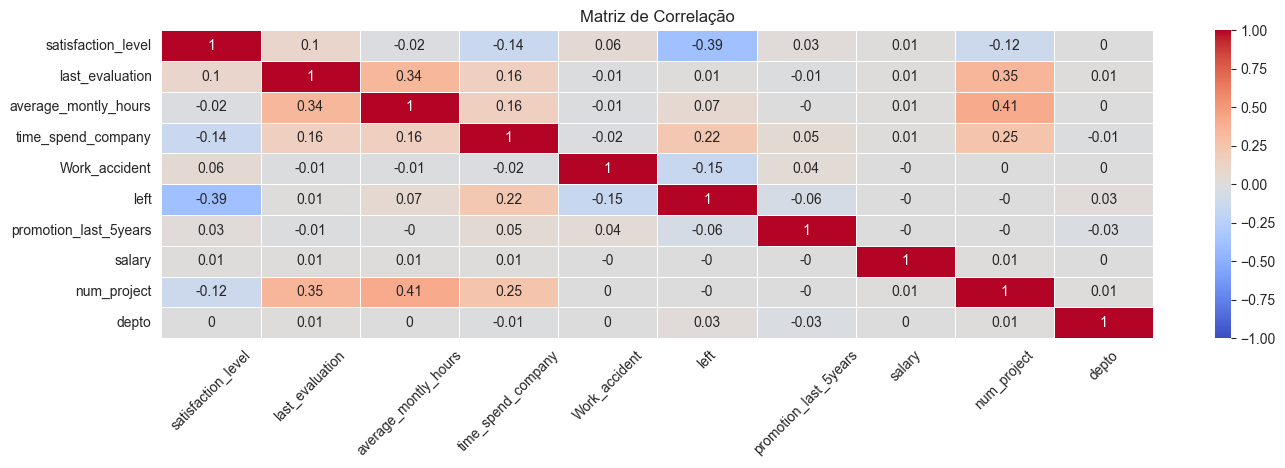

In [52]:
plt.figure(figsize=(16, 4))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1)#type: ignore
plt.title('Matriz de Correlação')
plt.xticks(rotation=45)
plt.show()

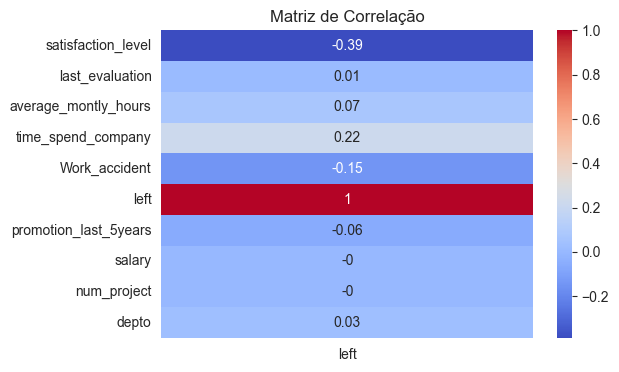

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix['left'].to_frame(), annot=True, cmap='coolwarm')#type: ignore
plt.title('Matriz de Correlação')
plt.show()

## Passo 5

Construção de modelos

In [54]:
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])
df['depto'] = label_encoder.fit_transform(df['depto'])

In [55]:
X = df.drop("left", axis=1)
y = df["left"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [56]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train) #type: ignore

In [58]:
from sklearn.metrics import make_scorer, f1_score
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [x for x in range(2, 10)], # Número de vizinhos.
    'weights': ['uniform', 'distance'], # Peso atribuído aos vizinhos ('uniform' - todos os vizinhos têm o mesmo peso, 'distance' - pesos inversamente proporcionais à distância).
    'metric': ['cosine', 'euclidean', 'manhattan', 'chebyshev', 'minkowski'], # Métrica de distância usada para calcular a proximidade entre os pontos.
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   # Algoritmo usado para calcular os vizinhos mais próximos.
    'leaf_size': [20, 30, 40] # Tamanho da folha para algoritmos 'ball_tree' e 'kd_tree'.
}

gs_metric_knn = make_scorer(f1_score, greater_is_better=True)
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring=gs_metric_knn,
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train_smote, y_train_smote) #type: ignore
knn_params = grid_knn.best_params_
print('Melhores Parâmetros do KNN:', knn_params)

best_knn = KNeighborsClassifier(**knn_params)
best_knn.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_knn = best_knn.predict(X_test_scaled)

Melhores Parâmetros do KNN: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [59]:
dt = DecisionTreeClassifier()
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'], # Função para medir a qualidade da divisão em um nó.
    'splitter': ['best', 'random'], # Estratégia para escolher a divisão em cada nó.
    'max_depth': [None, 10, 20, 30, 40, 50, 100, 200], # Profundidade máxima da árvore.
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [1, 2, 4] # Número mínimo de amostras necessárias para estar em um nó folha.
}

gs_metric_dt = make_scorer(f1_score, greater_is_better=True)
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring=gs_metric_dt,
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train_smote, y_train_smote) #type: ignore
dt_params = grid_dt.best_params_
print('Melhores Parâmetros da Decision Tree:', dt_params)

best_dt = DecisionTreeClassifier(**dt_params)
best_dt.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_dt = best_dt.predict(X_test_scaled)

Melhores Parâmetros da Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [60]:
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500], # Número de árvores na floresta.
    'criterion': ['gini', 'entropy', 'log_loss'], # Função para medir a qualidade da divisão.
    'max_depth': [None, 10, 20, 30], # Profundidade máxima da árvore.
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [1, 2, 4] # Número mínimo de amostras necessárias para estar em um nó folha.
}

gs_metric_rf = make_scorer(f1_score, greater_is_better=True)
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring=gs_metric_rf,
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train_smote, y_train_smote) #type: ignore
rf_params = grid_rf.best_params_
print('Melhores parâmetros da Random Forest:', rf_params)

best_rf = RandomForestClassifier(**rf_params)
best_rf.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_rf = best_rf.predict(X_test_scaled)

Melhores parâmetros da Random Forest: {'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [61]:
svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10, 50, 100, 200, 300], # Parâmetro de regularização.
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # Tipo de kernel ('linear' para SVM linear, 'rbf' para função de base radial, 'poly' para polinomial, 'sigmoid' para sigmoid).
    'gamma': ['scale', 'auto'], # Coeficiente do kernel para 'rbf' (scale: 1 / (n_features * X.var()), auto: 1 / n_features).
    'decision_function_shape': ['ovo', 'ovr'] # Esquema para a função de decisão ('ovo' para one-vs-one, 'ovr' para one-vs-rest).
}

gs_metric_svm = make_scorer(f1_score, greater_is_better=True)
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm ,
    scoring=gs_metric_svm ,
    cv=5,
    n_jobs=-1
)

grid_svm.fit(X_train_smote, y_train_smote) #type: ignore
svm_params = grid_svm.best_params_
print('Melhores Parâmetros do SVM:', svm_params)

best_svm = SVC(**svm_params, probability=True)
best_svm.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_svm = best_svm.predict(X_test_scaled)

Melhores Parâmetros do SVM: {'C': 300, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


In [62]:
ada_boost = AdaBoostClassifier()
param_grid_ada_boost = {
    'n_estimators': [50, 100, 150, 200, 250, 300], # Número de classificadores.
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0] # Taxa de aprendizado.
}

gs_metric_ada_boost = make_scorer(f1_score, greater_is_better=True)
grid_ada_boost = GridSearchCV(
    estimator=ada_boost,
    param_grid=param_grid_ada_boost,
    scoring=gs_metric_ada_boost,
    cv=5,
    n_jobs=-1
)

grid_ada_boost.fit(X_train_smote, y_train_smote) #type: ignore
best_ada_params = grid_ada_boost.best_params_
print('Melhores Parâmetros do AdaBoost:', best_ada_params)

best_ada_boost = AdaBoostClassifier(**best_ada_params)
best_ada_boost.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_ada_boost = best_ada_boost.predict(X_test_scaled)

Melhores Parâmetros do AdaBoost: {'learning_rate': 1.5, 'n_estimators': 300}


In [63]:
gnb = GaussianNB()
cv_scores_gnb = cross_val_score(gnb, X_train_smote, y_train_smote, cv=5) #type: ignore
gnb.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_gnb = gnb.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print(f'Acurácia do GaussianNB: {accuracy_gnb:.2f}')
print(f'Acurácia Média da Validação Cruzada: {cv_scores_gnb.mean():.2f}')
print(f'Desvio Padrão da Validação Cruzada: {cv_scores_gnb.std():.2f}')

Acurácia do GaussianNB: 0.66
Acurácia Média da Validação Cruzada: 0.76
Desvio Padrão da Validação Cruzada: 0.01


In [64]:
mlp_classifier = MLPClassifier()
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)], # Tamanhos das camadas ocultas.
    'activation': ['relu', 'tanh', 'logistic', 'identity'], # Funções de ativação.
    'alpha': [0.0001, 0.001, 0.01], # Termo de regularização L2.
    'solver': ['sgd', 'adam'],  # Otimizadores para o treinamento.
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Taxa de aprendizado para otimizadores 'sgd' e 'adam'.
}

gs_metric_mlp = make_scorer(f1_score, greater_is_better=True)
grid_mlp = GridSearchCV(
    estimator=mlp_classifier,
    param_grid=param_grid_mlp,
    scoring=gs_metric_mlp,
    cv=5,
    n_jobs=-1
)

grid_mlp.fit(X_train_smote, y_train_smote) #type: ignore
best_mlp_params = grid_mlp.best_params_
print('Melhores Parâmetros do MLPClassifier:', best_mlp_params)

best_mlp = MLPClassifier(**best_mlp_params)
best_mlp.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_mlp = best_mlp.predict(X_test_scaled)

Melhores Parâmetros do MLPClassifier: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [65]:
logistic_reg = LogisticRegression()
param_grid_log = {
    'C': [0.1, 1, 10], # Parâmetro de regularização.
    'solver': ['lbfgs', 'liblinear', 'saga'], # Algoritmo otimizador ('lbfgs' para dados multiclasse, 'liblinear' para dados binários, 'saga' para grande conjunto de dados)
    'penalty': ['l1', 'l2', 'elasticnet', 'None']  # Termo de regularização ('l1' para regularização L1, 'l2' para regularização L2, 'elasticnet' para combinação de L1 e L2, 'None' para sem regularização)
}

gs_metric_log = make_scorer(f1_score, greater_is_better=True)
grid_log = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid_log,
    scoring=gs_metric_log,
    cv=5,
    n_jobs=-1
)

grid_log.fit(X_train_smote, y_train_smote) #type: ignore
best_log_params = grid_log.best_params_
print('Melhores Parâmetros da Regressão Logística:', best_log_params)

best_log = LogisticRegression(**best_log_params)
best_log.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_log = best_log.predict(X_test_scaled)

Melhores Parâmetros da Regressão Logística: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [66]:
gbm = GradientBoostingClassifier()
param_grid_gbm = {
    'loss': ['log_loss', 'exponential'], # Função de perda a ser otimizada durante o treinamento.
    'criterion': ['friedman_mse', 'squared_error'], # Função para medir a qualidade de uma divisão em árvores de decisão.
    'n_estimators': [50, 100, 150, 200, 250, 300, 350], # Número de árvores de decisão.
    'learning_rate': [0.1, 0.5, 1.0], # Taxa de aprendizado.
    'max_depth': [3, 5, 7, 10, 15, 20, 30, 50] # Profundidade máxima das árvores de decisão.
}

gs_metric_gbm = make_scorer(f1_score, greater_is_better=True)
grid_gbm = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid_gbm,
    scoring=gs_metric_gbm,
    cv=5,
    n_jobs=-1
)

grid_gbm.fit(X_train_smote, y_train_smote) #type: ignore
best_gbm_params = grid_gbm.best_params_
print('Melhores Parâmetros do Gradient Boosting Machines (GBM):', best_gbm_params)

best_gbm = GradientBoostingClassifier(**best_gbm_params)
best_gbm.fit(X_train_smote, y_train_smote) #type: ignore
y_pred_gbm = best_gbm.predict(X_test_scaled)

Melhores Parâmetros do Gradient Boosting Machines (GBM): {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'exponential', 'max_depth': 10, 'n_estimators': 200}


## Passo 6

Validar o modelo

In [73]:
# best_knn
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia do KNN com Cross Validation: {accuracy_knn:.2f}')
report_knn = classification_report(y_test, y_pred_knn)
print('Relatório de Classificação:')
print(report_knn)
y_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1] #type: ignore
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f'AUC KNN: {roc_auc_knn:.2f}')
print('---')
# best_dt
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Acurácia da Decision Tree com Cross Validation: {accuracy_dt:.2f}')
report_dt = classification_report(y_test, y_pred_dt)
print('Relatório de Classificação:')
print(report_dt)
y_prob_dt = best_dt.predict_proba(X_test_scaled)[:, 1] #type: ignore
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print(f'AUC Decision Tree: {roc_auc_dt:.2f}')

Acurácia do KNN com Cross Validation: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3429
           1       0.91      0.96      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.95      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500

AUC KNN: 0.97
---
Acurácia da Decision Tree com Cross Validation: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3429
           1       0.91      0.96      0.94      1071

    accuracy                           0.97      4500
   macro avg       0.95      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500

AUC Decision Tree: 0.97


In [74]:
# best_rf
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia do Random Forest com Cross Validation: {accuracy_rf:.2f}')
report_rf = classification_report(y_test, y_pred_rf)
print('Relatório de Classificação:')
print(report_rf)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f'AUC Random Forest: {roc_auc_rf:.2f}')
print('---')
# best_svm
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Acurácia do SVM com Cross Validation: {accuracy_svm:.2f}')
report_svm = classification_report(y_test, y_pred_svm)
print('Relatório de Classificação:')
print(report_svm)
y_prob_svm = best_svm.predict_proba(X_test_scaled)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f'AUC SVM: {roc_auc_svm:.2f}')

Acurácia do Random Forest com Cross Validation: 0.99
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

AUC Random Forest: 0.99
---
Acurácia do SVM com Cross Validation: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3429
           1       0.92      0.94      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.95      4500
weighted avg       0.97      0.97      0.97      4500

AUC SVM: 0.98


In [75]:
# best_ada_boost
accuracy_ada_boost = accuracy_score(y_test, y_pred_ada_boost)
print(f'Acurácia do AdaBoost com Cross Validation: {accuracy_ada_boost:.2f}')
report_ada_boost = classification_report(y_test, y_pred_ada_boost)
print('Relatório de Classificação:')
print(report_ada_boost)
y_prob_ada_boost = best_ada_boost.predict_proba(X_test_scaled)[:, 1]
roc_auc_ada_boost = roc_auc_score(y_test, y_prob_ada_boost)
print(f'AUC AdaBoost: {roc_auc_ada_boost:.2f}')
print('---')
# gnb
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Acurácia do GaussianNB: {accuracy_gnb:.2f}')
print(f'Acurácia Média da Validação Cruzada: {cv_scores_gnb.mean():.2f}')
print(f'Desvio Padrão da Validação Cruzada: {cv_scores_gnb.std():.2f}')
report_gnb = classification_report(y_test, y_pred_gnb)
print('Relatório de Classificação:')
print(report_gnb)
y_prob_gnb = gnb.predict_proba(X_test_scaled)[:, 1]
roc_auc_gnb = roc_auc_score(y_test, y_prob_gnb)
print(f'AUC Gaussian Naive Bayes: {roc_auc_gnb:.2f}')

Acurácia do AdaBoost com Cross Validation: 0.94
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3429
           1       0.85      0.93      0.89      1071

    accuracy                           0.94      4500
   macro avg       0.91      0.94      0.92      4500
weighted avg       0.95      0.94      0.94      4500

AUC AdaBoost: 0.98
---
Acurácia do GaussianNB: 0.66
Acurácia Média da Validação Cruzada: 0.76
Desvio Padrão da Validação Cruzada: 0.01
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      3429
           1       0.41      0.94      0.57      1071

    accuracy                           0.66      4500
   macro avg       0.69      0.76      0.65      4500
weighted avg       0.84      0.66      0.69      4500

AUC Gaussian Naive Bayes: 0.86


In [76]:
# best_mlp
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Acurácia do MLPClassifier com Cross Validation: {accuracy_mlp:.2f}')
report_mlp = classification_report(y_test, y_pred_mlp)
print('Relatório de Classificação:')
print(report_mlp)
y_prob_mlp = best_mlp.predict_proba(X_test_scaled)[:, 1]
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)
print(f'AUC Multilayer Perceptron: {roc_auc_mlp:.2f}')
print('---')
# best_log
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Acurácia da Regressão Logística com Cross Validation: {accuracy_log:.2f}')
report_log = classification_report(y_test, y_pred_log)
print('Relatório de Classificação:')
print(report_log)
y_prob_log = best_log.predict_proba(X_test_scaled)[:, 1]
roc_auc_log = roc_auc_score(y_test, y_prob_log)
print(f'AUC Logistic Regression: {roc_auc_log:.2f}')


Acurácia do MLPClassifier com Cross Validation: 0.96
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3429
           1       0.91      0.94      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

AUC Multilayer Perceptron: 0.99
---
Acurácia da Regressão Logística com Cross Validation: 0.78
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      3429
           1       0.53      0.83      0.64      1071

    accuracy                           0.78      4500
   macro avg       0.73      0.80      0.74      4500
weighted avg       0.84      0.78      0.80      4500

AUC Logistic Regression: 0.84


In [77]:
# best_gbm
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'Acurácia do Gradient Boosting Machines (GBM) com Cross Validation: {accuracy_gbm:.2f}')
report_gbm = classification_report(y_test, y_pred_gbm)
print('Relatório de Classificação:')
print(report_gbm)
y_prob_gbm = best_gbm.predict_proba(X_test_scaled)[:, 1]
roc_auc_gbm = roc_auc_score(y_test, y_prob_gbm)
print(f'AUC Gradient Boosting Machines: {roc_auc_gbm:.2f}')

Acurácia do Gradient Boosting Machines (GBM) com Cross Validation: 0.99
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.98      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

AUC Gradient Boosting Machines: 0.99


In [85]:
import plotly.graph_objects as go

model_names = [
    'KNN',
    'Decision Tree',
    'Random Forest',
    'SVM',
    'AdaBoost',
    'Gaussian Naive Bayes',
    'Logistic Regression',
    'Multilayer Perceptron',
    'Gradient Boosting Machines'
]

y_probs_list = [
    y_prob_knn,
    y_prob_dt,
    y_prob_rf,
    y_prob_svm,
    y_prob_ada_boost,
    y_prob_gnb,
    y_prob_log,
    y_prob_mlp,
    y_prob_gbm
]

y_tests_list = [y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test]

fig = go.Figure()

for i, (y_prob, y_test) in enumerate(zip(y_probs_list, y_tests_list)):
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{model_names[i]} (area = {roc_auc:.2f})'))

fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)

fig.update_layout(
    title='Curva ROC',
    xaxis_title='Taxa de Falsos Positivos (FPR)',
    yaxis_title='Taxa de Verdadeiros Positivos (TPR)',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),
    legend=dict(x=1.02, y=0.5, bgcolor='rgba(255, 255, 255, 0.5)', orientation='v')
)
fig.show()

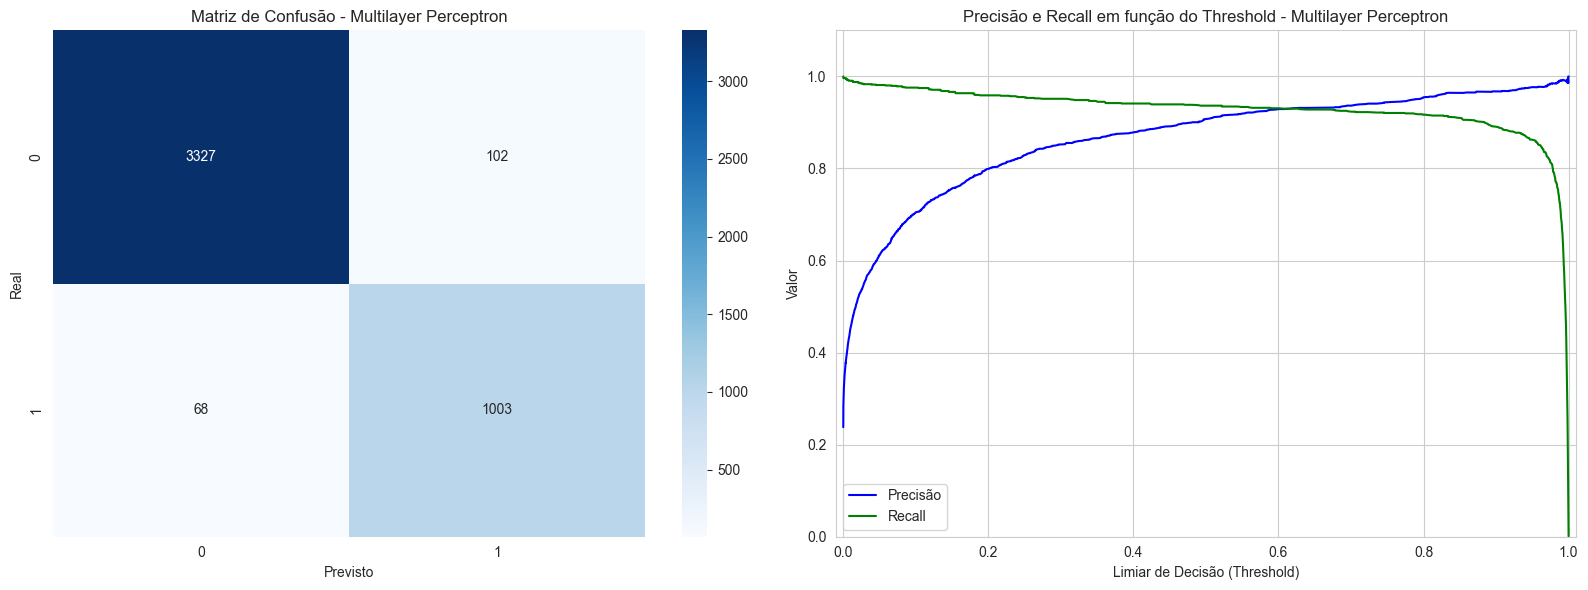

In [102]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_mlp)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1']) #type: ignore
plt.title('Matriz de Confusão - Multilayer Perceptron')
plt.xlabel('Previsto')
plt.ylabel('Real')

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], label='Precisão', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Limiar de Decisão (Threshold)')
plt.ylabel('Valor')
plt.title('Precisão e Recall em função do Threshold - Multilayer Perceptron')
plt.legend()
plt.grid(True)
plt.axis([-0.01, 1.01, 0, 1.1])  
plt.tight_layout()
plt.show()

In [103]:
new_data = [
    [0.3, 0.5, 150, 3, 0, 0, label_encoder.fit_transform(['medium'])[0], 2, label_encoder.fit_transform(['sales'])[0]] #type: ignore
]
scaler.transform(new_data) #type: ignore
predictions = best_mlp.predict(scaler.transform(new_data)) #type: ignore
print(predictions)

[0]


Salvar o modelo

In [104]:
with open(f'Data/MLP_Model', 'wb') as output:
    pickle.dump(best_mlp, output)

- Acurácia:
  - Indica que o modelo acerta aproximadamente 96% das previsões.
---
- Precisão: 
  - A classe 0 é de 0.98, indica que das instâncias classificadas como negativas, 99% realmente pertencem à classe negativa.
  - A classe 1 é de 0.91, indicando que, das instâncias classificadas como positivas, 98% são realmente da classe positiva. 
- Isso sugere que o modelo tem uma alta capacidade de evitar falsos positivos e falsos negativos.
---
- Recall (Sensibilidade/Taxa de Verdadeiros Positivos):
  - A classe 0 é de 0.97, o que significa que o modelo identifica corretamente 99% das instâncias verdadeiramente positivas.
  - A classe 1 é de 0.94, o que significa que o modelo identifica corretamente 97% das instâncias verdadeiramente positivas. 
- Isso mostra que o modelo tem uma alta capacidade de identificar ambas as classes com uma pequena taxa de falsos negativos para a classe 1.
---
- F1-Score: É uma média harmônica entre precisão e recall.
  - A classe 0 é de 0.98, 
  - A classe 1 é de 0.92.
- Considera tanto os falsos positivos quanto os falsos negativos.
---
- Curva ROC e AUC:
  - Mostra um trade-off entre a taxa de verdadeiros positivos (recall) e a taxa de falsos positivos para diferentes limiares de decisão.
  - O fato de a curva ROC estar próxima do canto superior esquerdo do gráfico indica um excelente desempenho do modelo.
  - A AUC que mede a área sob a curva ROC é de 0.99 indicando um desempenho muito bom.